같이 포함되어있는 Boston.csv를 꼭 받아주세요.

In [5]:
# !pip install statsmodels

In [6]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [7]:
# 데이터 불러오기
boston = pd.read_csv("./Boston.csv")


In [8]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [9]:
boston_data.describe() # <--이거 금융파이낸스에서 봤던거요.. :) 판다스 데이터 출력

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [10]:
'''
데이터 컬럼 해석
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n데이터 컬럼 해석\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

# crim/rm/lstat 세개의 변수로 각각 단순 선형 회귀 분석하기
  (범죄율/주택당 방수/인구 중 하위 계층 비율)


In [16]:
target = boston[['Target']] #주택가격
# boston_target
crim=boston[['CRIM']] #범죄율 
rm=boston[['RM']] #주택당 방
lstat=boston['LSTAT'] #인구중 하위 계층 

## target ~ crim 선형회귀분석

- OLS = Ordinary Least Squares 즉 최소제곱법 회귀분석 / **독립 변수**와 **종속 변수** 사이의 선형 관계를 추정하는데 사용함!
  - 우리 2차시에 별보고 이거는 독립변수가 변경될때 종속변수가 변하는거요! 했떤거요.
- OLS의 핵심
  - 가장 잘 맞는 직선을 찾기 위해 데이터 포인트와 회귀선 사이의 거리(오차)의 제곱합을 최소화합니다.
-  각 데이터 포인트에서 실제 값과 예측 값의 차이를 **잔차(residual)**라고 하는데, OLS는 이 잔차의 제곱합이 가장 작아지도록 회귀 계수를 추정합니다.  
- OLS의 공식:
  - OLS는 아래와 같은 선형 회귀 방정식을 추정합니다.
  - 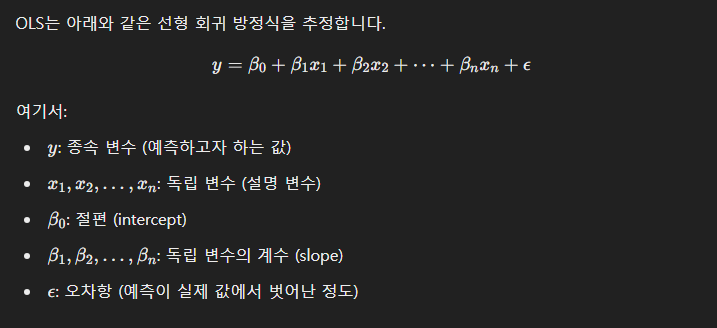

- Model1은 독립변수(범죄율) 종속변수(집세)
    - 왜? 범죄율이 변할 떄 집세의 변화를 보는거니까.. 
    - 만약, 집세가 변할 때 범죄율의 변화를 보려면 반대겠죠?

In [13]:

crim1 = sm.add_constant(crim, has_constant='add') #독립변수에 상수항 추가

In [14]:
model1 = sm.OLS(target,crim1)  #독립변수 crime에 종속변수 target을 추가하는 식. 종속변수가 앞에 갑니다.
fitted_model1=model1.fit()

In [15]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.17e-19
Time:                        11:58:57   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## y=b0 + b1 * X 계산
 - 이렇게 계산한다만.. 알고 계시면 됩니다.


In [15]:
(np.dot(crim1,fitted_model1.params))

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

fitted 된 총 갯수가 데이터 갯수랑 맞아야하겠죠?

In [16]:
len(np.dot(crim1,fitted_model1.params))

506

In [17]:
pred1=fitted_model1.predict(crim1)

In [18]:
pred1-np.dot(crim1,fitted_model1.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

## 적합시킨 직선 시각화

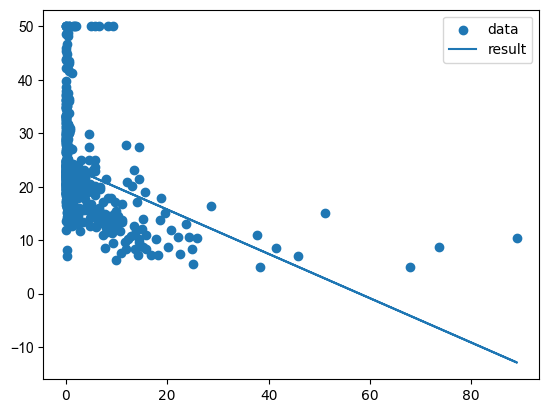

In [19]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(crim,target,label="data")
plt.plot(crim,pred1,label="result")
plt.legend()
plt.show()

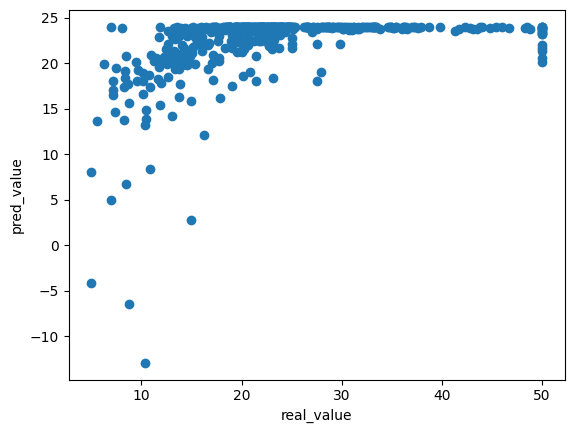

In [20]:

plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

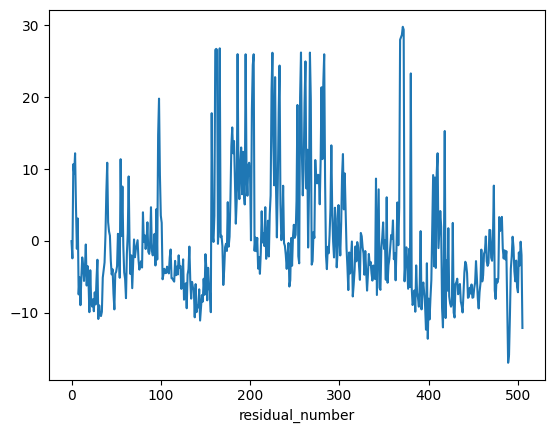

In [21]:
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

##잔차의 합계산해보기

sum(fitted_model1.resid)

## 위와 동일하게 rm변수와 lstat 변수로 각각 단순선형회귀분석 적합시켜보기
 - rm = 방 개수
 - lstat = 인구중 하위 계층

In [23]:
rm1 = sm.add_constant(rm, has_constant='add')
lstat1 = sm.add_constant(lstat, has_constant='add')

In [48]:
model2 = sm.OLS(target, rm1)
fitted_model2=model2.fit()

model3 = sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [49]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.17e-19
Time:                        11:42:16   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.08e-88
Time:                        10:59:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

실제 선을 그어보죠.

In [27]:
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)


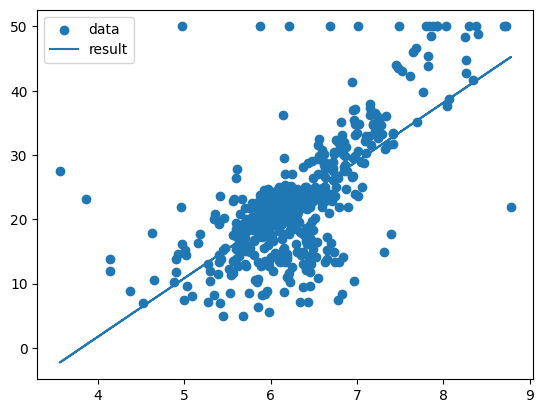

In [55]:
#우리 경제학시간에 한창 했떤거.. 맷플롯라이브러리로 그래프 그리는거요.. :) 
#model2은 방 갯수와 집 가격간 상관관계죠?. 
import matplotlib.pyplot as plt
plt.scatter(rm,target,label="data") #scatter 점찍기/"산점도"라고합니다.
plt.plot(rm,pred2,label="result") #직선 긋기
plt.legend() #범주 표시
plt.show() #쇼!

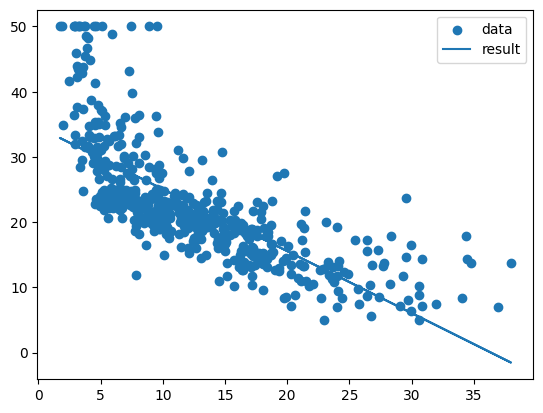

In [56]:
#model3은 하위 계층 별 집가격과 상관관계죠?. 
import matplotlib.pyplot as plt
plt.scatter(lstat,target,label="data") #산점도
plt.plot(lstat,pred3,label="result") # 줄 긋기
plt.legend() # 범주
plt.show() # 쇼!

## 독립변수를 여러개로 늘려보기
 - rm = 방 개수
 - lstat = 인구중 하위 계층

In [17]:
CrimeRm=boston[['CRIM','RM']]#범죄, 방
CrimeRmLstat=boston[['CRIM','RM','LSTAT']]#범죄,방,하위계층 #이거하면 어디서 많이 본 표가 나옵니다. 
print(CrimeRmLstat)

        CRIM     RM  LSTAT
0    0.00632  6.575   4.98
1    0.02731  6.421   9.14
2    0.02729  7.185   4.03
3    0.03237  6.998   2.94
4    0.06905  7.147   5.33
..       ...    ...    ...
501  0.06263  6.593   9.67
502  0.04527  6.120   9.08
503  0.06076  6.976   5.64
504  0.10959  6.794   6.48
505  0.04741  6.030   7.88

[506 rows x 3 columns]


In [18]:
ConstantCrimeRm = sm.add_constant(CrimeRm) #독립변수에 상수항 추가
ConstantCrimeRmLstat = sm.add_constant(CrimeRmLstat) #독립변수에 상수항 추가

In [23]:
model4 = sm.OLS(target, ConstantCrimeRm)
fitted_model4=model4.fit()

model5 = sm.OLS(target, ConstantCrimeRmLstat)
fitted_model5=model5.fit()


In [24]:
fitted_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.22e-86
Time:                        12:03:56   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
fitted_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          1.01e-112
Time:                        12:04:02   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""